In [112]:
import numpy
import os
import soundfile as sf
import matplotlib.pyplot as plt
from scipy.io.wavfile import write
from python_speech_features import mfcc
from python_speech_features.base import delta
import warnings
from sklearn import preprocessing
from sklearn import svm
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.manifold import TSNE
from mlxtend.plotting import plot_decision_regions
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.mixture import GaussianMixture
from sklearn.mixture import BayesianGaussianMixture
import pickle as pk
# from sklearn.hmm import GaussianMixture

In [113]:
def picklevar(filename, varname):
    file = open(filename, 'wb')
    pk.dump(varname, file)
    file.close()

In [114]:
picklevar('clf_svm_C5gamma0.1.pkl',clf_svm)

In [115]:
def extract_features(audio_data, samplerate):
    mfcc_features = []
    hamming_window = numpy.hamming(400)
    if (len(audio_data.shape) > 1):
        audio_data = audio_data[:,0]
    for i in range(0,audio_data.shape[0]-400,240):
        trimmed = audio_data[i:i+400]
        hammed = numpy.multiply(hamming_window, trimmed)
        mfcced = mfcc(hammed,samplerate, nfft = 2048)
        mfcc_features.append(mfcced[0])
    delta_features = delta(mfcc_features, 1)
    return mfcc_features, delta_features

In [33]:
english_mfcc_features = []
english_delta_features = []
english_features = []
num_iterations = 0
for file in os.listdir("C:\\Users\Lenovo\Desktop\\Utility\Semester 5\Machine Learning\Project\English_Data_2\\"):
    audio_data, samplerate = sf.read("C:\\Users\Lenovo\Desktop\\Utility\Semester 5\Machine Learning\Project\English_Data_2\\" + file)
    print(file, samplerate)
    audio_mfcc, audio_delta = extract_features(audio_data, samplerate)
    english_mfcc_features.extend(audio_mfcc)
    english_delta_features.extend(audio_delta)
    num_iterations+=1

# print("Done")

1272-128104-0000.flac 16000
1272-128104-0001.flac 16000
1462-170138-0000.flac 16000
1462-170138-0001.flac 16000
1673-143396-0000.flac 16000
1673-143396-0001.flac 16000
174-168635-0000.flac 16000
174-168635-0001.flac 16000
1919-142785-0000.flac 16000
1919-142785-0001.flac 16000
1988-147956-0000.flac 16000
1988-147956-0001.flac 16000
1993-147149-0000.flac 16000
1993-147149-0001.flac 16000
2035-147960-0000.flac 16000
2035-147960-0001.flac 16000
2078-142845-0000.flac 16000
2078-142845-0001.flac 16000
2086-149214-0000.flac 16000
2086-149214-0001.flac 16000
2277-149874-0000.flac 16000
2277-149874-0001.flac 16000
2412-153947-0000.flac 16000
2412-153947-0001.flac 16000
2428-83699-0000.flac 16000
2428-83699-0001.flac 16000
251-118436-0000.flac 16000
251-118436-0001.flac 16000
2803-154320-0000.flac 16000
2803-154320-0001.flac 16000
2902-9006-0000.flac 16000
2902-9006-0001.flac 16000
3000-15664-0000.flac 16000
3000-15664-0001.flac 16000
3081-166546-0000.flac 16000
3081-166546-0001.flac 16000
3170

In [85]:
hindi_mfcc_features = []
hindi_delta_features = []
hindi_features = []
num_iterations = 0
for file in os.listdir("C:\\Users\Lenovo\Desktop\\Utility\Semester 5\Machine Learning\Project\Hindi_Data_2\\"):
    audio_data, samplerate = sf.read("C:\\Users\Lenovo\Desktop\\Utility\Semester 5\Machine Learning\Project\Hindi_Data_2\\" + file)
    hamming_window = numpy.hamming(400)
    print(file, samplerate)
    audio_mfcc, audio_delta = extract_features(audio_data, samplerate)
    hindi_mfcc_features.extend(audio_mfcc)
    hindi_delta_features.extend(audio_delta)
    num_iterations+=1

00ywwvulzwa.flac 44100
01rjjbm5mtn.flac 44100
0ec1nsncnvc.flac 44100
0ujcc5vsbnh.flac 44100
0wmrtwefmwj.flac 44100
1fwa0bfo3vs.flac 44100
1mqlurofzcu.flac 44100
1nc0wjirijz.flac 44100
1smbn4j3qry.flac 44100
1wifa3dsmpd.flac 44100
1yyn1gkhmvf.flac 44100
2czq3regbma.flac 44100
2flc0crdrum.flac 44100
2gk23agp2hp.flac 44100
2ijrmsw43m1.flac 44100
2lx5k3do3uv.flac 44100
2msjr3tf3oz.flac 44100
2qw2zhf4bmj.flac 44100
2sgpwo1rstm.flac 44100
2y4j5w5yvgn.flac 44100
2zrgzwzzfid.flac 44100
3emmoabevvf.flac 44100
3fet3eip1g3.flac 44100
3piuebekss2.flac 44100
3q51xcd3ebx.flac 44100
3vkq0ud3ox5.flac 44100
3xuval2d5xf.flac 44100
4aplyhc11dr.flac 44100
4b41wqocpcy.flac 44100
4jdw2v3b2fy.flac 44100
h1.flac 44100
h10.flac 44100
h11.flac 22050
h2.flac 44100
h3.flac 44100
h4.flac 44100
h5.flac 44100
h6.flac 44100
h7.flac 44100
h8.flac 44100
h9.flac 44100


In [86]:
print(len(hindi_mfcc_features), len(hindi_delta_features))
print(len(english_mfcc_features), len(english_delta_features))
if (len(hindi_mfcc_features) != len(hindi_delta_features)):
    print("PROBLEM")

73453 73453
59500 59500


In [87]:
zeros = [0]*len(english_mfcc_features)
english_mfcc_features = numpy.array(english_mfcc_features)
english_delta_features = numpy.array(english_delta_features)
x_English = numpy.concatenate((english_mfcc_features, english_delta_features), axis = 1)

ones = [1]*len(hindi_mfcc_features)
hindi_mfcc_features = numpy.array(hindi_mfcc_features)
hindi_delta_features = numpy.array(hindi_delta_features)
x_Hindi = numpy.concatenate((hindi_mfcc_features, hindi_delta_features),axis = 1)

X = numpy.concatenate((x_English, x_Hindi), axis=0)
Y = numpy.concatenate((zeros, ones), axis=0)
normalized_X = preprocessing.normalize(X)

In [88]:
x_train, x_test, y_train, y_test = train_test_split(normalized_X, Y, test_size = 0.2)

In [89]:
#SVM
# parameters = [{'kernel': ['rbf'], 'gamma' : [0.001,0.05,0.1,10], 'C' : [0.001, 0.01, 0.1, 1,2.5,100]}]
# clf = GridSearchCV(svm.SVC(), parameters, cv = 5)
# clf = GridSearchCV(svm.SVC())
clf_svm = svm.SVC(gamma = 0.1, C = 5)
clf_svm.fit(x_train, y_train)

SVC(C=5, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [12]:
#Logistic Regression
clf_logistic = LogisticRegression(penalty="l2", solver='lbfgs')
clf_logistic.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='lbfgs', tol=0.0001,
          verbose=0, warm_start=False)

In [13]:
#MLP Classifier
clf_nn = MLPClassifier(hidden_layer_sizes = (100, 50, 20))
clf_nn.fit(x_train, y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100, 50, 20), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [ ]:
#NN Train - without feature extraction
train_data = []
train_labels = []
for file in os.listdir("C:\\Users\Lenovo\Desktop\\Utility\Semester 5\Machine Learning\Project\English_Data_New\\"):
        data, samplerate = sf.read("C:\\Users\Lenovo\Desktop\\Utility\Semester 5\Machine Learning\Project\English_Data_New\\" + file)
        if (len(data.shape) > 1):
            data = data[:,0]
        train_data.append(data[0:10000])
        train_labels.append(0)
        
for file in os.listdir("C:\\Users\Lenovo\Desktop\\Utility\Semester 5\Machine Learning\Project\Hindi_Data_New\\"):
        data, samplerate = sf.read("C:\\Users\Lenovo\Desktop\\Utility\Semester 5\Machine Learning\Project\Hindi_Data_New\\" + file)
        if (len(data.shape) > 1):
            data = data[:,0]
        train_data.append(data[:10000])
        train_labels.append(1)

In [ ]:
#NN Test - without feature extraction
test_data, samplerate = sf.read("C:\\Users\Lenovo\Desktop\\Utility\Semester 5\Machine Learning\Project\\Eng_Sur.flac")
test_data = test_data[:,0]
test_data = test_data[:10000]
print(test_data.shape)
test_data = numpy.reshape(test_data, (1, 10000))
pred = clf_nn.predict_proba(test_data)
print(pred)

In [190]:
#GMM
clf_gmm = GaussianMixture()
clf_gmm.fit(x_train, y_train)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
        means_init=None, n_components=1, n_init=1, precisions_init=None,
        random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
        verbose_interval=10, warm_start=False, weights_init=None)

In [177]:
#HMM

In [90]:
print(clf_svm.score(x_test, y_test))
# print(clf_logistic.score(x_test, y_test))
# print(clf_nn.score(x_test, y_test))
# pred = clf.predict(x_test)
# print(accuracy_score(pred, y_test))

0.9151968711218081


In [71]:
def testing(filename, clf):
    mfcc_features = []
    delta_features = []
    test_English = []
    #data, samplerate = sf.read("C:\\Users\Lenovo\Desktop\\Utility\Semester 5\Machine Learning\Project\\Eng_Sur.flac")
    data, samplerate = sf.read(filename)
    print(data.shape)
    print(samplerate)
    if(len(data.shape) > 1):
        data = data[:,0]
    mfcc_features, delta_features = extract_features(data, samplerate)
    test_English = numpy.concatenate((mfcc_features,delta_features),axis = 1)
    test_English = preprocessing.normalize(test_English)
    results = clf.predict(test_English)
    print(results)
    print(sum(results))
    print("English Accuracy:")
    print(1-sum(results)/len(test_English))
    print("Hindi Accuracy:")
    print(sum(results)/len(test_English))

In [98]:
testing('C:\\Users\Lenovo\Desktop\\Utility\Semester 5\Machine Learning\Project\\Hindi_Data_New\\Hindi3.flac', clf_svm)

(661500, 2)
44100
[0 0 1 ... 0 0 0]
437
English Accuracy:
0.8413793103448276
Hindi Accuracy:
0.15862068965517243


In [56]:
mfcc_features = []
delta_features = []
test_Hindi = []
data, samplerate = sf.read("C:\\Users\Lenovo\Desktop\\Utility\Semester 5\Machine Learning\Project\\Test\\Eng_Sur.flac")
print(data.shape)
print(samplerate)
data = data[:,0]
mfcc_features, delta_features = extract_features(data, samplerate)
test_Hindi = numpy.concatenate((mfcc_features,delta_features),axis = 1)
test_Hindi = preprocessing.normalize(test_Hindi)
results = clf_svm.predict(test_Hindi)
print(results)
print(sum(results))
print (sum(results)/len(test_Hindi))

(65280, 2)
16000
[1 0 1 1 1 1 1 0 0 0 0 0 1 1 0 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0
 0 0 0 0 0 0 0 1 0 0 0 0]
22
0.08118081180811808


1
2


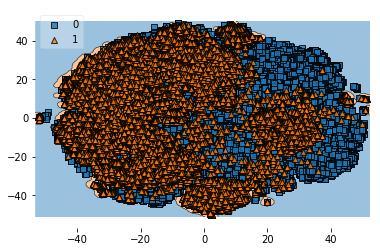

In [45]:
tsne_images = TSNE(n_components=2).fit_transform(normalized_X)
tsne_classifier = svm.SVC()
print(1)
tsne_classifier.fit(tsne_images, Y)
print(2)
plot_decision_regions(tsne_images, (numpy.asarray(Y)).astype(int), clf = tsne_classifier, legend = 2)

NameError: name 'ax' is not defined

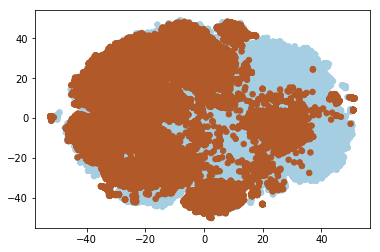

In [53]:
plot_support_vectors(tsne_images, (numpy.asarray(Y)).astype(int), tsne_classifier)

In [52]:
def plot_support_vectors(X, Y, clf):
    
    cmap_type = plt.cm.Paired
    s_val = 30
    
    plt.scatter(X[:, 0], X[:, 1], s = s_val, c = Y, cmap = cmap_type)

    current_axes = plt.gca()
    xlim = current_axes.get_xlim()
    ylim = current_axes.get_ylim()
    xx = numpy.linspace(xlim[0], xlim[1], s_val)
    yy = numpy.linspace(ylim[0], ylim[1], s_val)
    YY, XX = numpy.meshgrid(yy, xx)
    xy = numpy.vstack([XX.ravel(), YY.ravel()]).T
    Z = clf.decision_function(xy).reshape(XX.shape)

    ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s = 100,
               linewidth = 1, facecolors = 'none', edgecolors = 'k')

    #reference taken from: http://scikit-learn.org/stable/auto_examples/svm/plot_iris.html


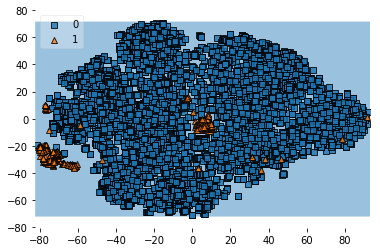

In [215]:
data, samplerate = sf.read("C:\\Users\Lenovo\Desktop\\Utility\Semester 5\Machine Learning\Project\\Eng_Abhi.flac")
data = data[:,0]
hin_mfcc, hin_delta = extract_features(data, samplerate)
data, samplerate = sf.read("C:\\Users\Lenovo\Desktop\\Utility\Semester 5\Machine Learning\Project\\Eng_sur.flac")
data = data[:,0]
eng_mfcc, eng_delta = extract_features(data, samplerate)

zeros = [0]*len(x_English)

# zeros = [0]*len(eng_mfcc)
eng_mfcc = numpy.array(eng_mfcc)
eng_delta = numpy.array(eng_delta)
# x_English = numpy.concatenate((eng_mfcc, eng_delta), axis = 1)
ones = [1]*len(hin_mfcc)
hin_mfcc = numpy.array(hin_mfcc)
hin_delta = numpy.array(hin_delta)
x_Hindi = numpy.concatenate((hin_mfcc, hin_delta), axis = 1)
# x_Hindi = hin_delta
X = numpy.concatenate((x_English, x_Hindi), axis=0)
Y = numpy.concatenate((zeros, ones), axis=0)
normalized_X = preprocessing.normalize(X)

tsne_images = TSNE(n_components=2).fit_transform(normalized_X)
tsne_classifier = svm.SVC()
tsne_classifier.fit(tsne_images, Y)
plot_decision_regions(tsne_images, (numpy.asarray(Y)).astype(int), clf = tsne_classifier, legend = 2)

In [26]:
audio_data, samplerate = sf.read("C:\\Users\Lenovo\Desktop\\Utility\Semester 5\Machine Learning\Project\\Hindi_Data_flac\\h2.flac")
print(samplerate)
                                 


44100
